In [2]:
import pandas as pd
comments=pd.read_excel('evaluations_overall_comments.xlsx')

In [3]:
comments

,Target:,Evaluator:,Rotation Dates:,Service:,Answer:
0,Eliza Chen,"Dr. Ong, Andrew Ming Liang",7/1/2022-7/31/2022,- -,Eliza Chen is starting out and therefore as ex...
1,Eliza Chen,"Dr. Chan, Webber Pak Wo",7/1/2022-7/31/2022,SHS-GASTRO:BASIC ENDO-SGH,"As a new senior resident to gastroenterology, ..."
2,Eliza Chen,"Dr. Lim, Chee Hooi",7/1/2022-7/31/2022,SHS-GASTRO:BASIC ENDO-SGH,No concern
3,Eliza Chen,"Dr. Chang, Jason Pik Eu",8/1/2022-8/31/2022,SHS-GASTRO:BASIC ENDO-SGH,Overall I would rate Eliza Chen highly as a SR...
4,Eliza Chen,"Dr. Tan, Chee Kiat",8/1/2022-8/31/2022,SHS-GASTRO:BASIC ENDO-SGH,Eliza Chen has a quiet disposition and gives g...
...,...,...,...,...,...
163,Rachel Yeap,"Dr. Tan, Malcolm Teck Kiang",7/1/2022-7/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,"did a week of bleeder call, good mgmt plans an..."
164,Rachel Yeap,"Dr. Khor, Christopher Jen Lock",8/1/2022-8/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,"very competent, extremely professional, and a ..."
165,Rachel Yeap,"Dr. Liou, Wei Lun",8/1/2022-8/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,No issue. Making good progress compared to fir...
166,Rachel Yeap,"Dr. Loo, Khang Ning",9/1/2022-10/2/2022,SHS-IM:GEN MED-SGH,Rachel is clinically competent and I can trust...


In [4]:
#install vaderSentimentlibrary
# !pip install vaderSentiment

#import the library
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#calculate the negative, positive, neutral and compound scores, plus verbal evaluation
def sentiment_vader(sentence):

    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()

    sentiment_dict = sid_obj.polarity_scores(sentence)
    negative = sentiment_dict['neg']
    neutral = sentiment_dict['neu']
    positive = sentiment_dict['pos']
    compound = sentiment_dict['compound']

    if sentiment_dict['compound'] >= 0.05 :
        overall_sentiment = "Positive"

    elif sentiment_dict['compound'] <= - 0.05 :
        overall_sentiment = "Negative"

    else :
        overall_sentiment = "Neutral"
  
    # return negative, neutral, positive, compound, overall_sentiment
    return compound


comments['Vader1 Score']=comments.apply(lambda x: sentiment_vader(x['Answer:']),axis=1)
comments['Vader1 Score']

0      0.8954
1      0.2732
2     -0.2960
3      0.8807
4      0.6290
        ...  
163    0.3818
164    0.7425
165    0.5423
166    0.7184
167    0.5719
Name: Vader1 Score, Length: 168, dtype: float64

In [5]:
comments[['Vader1 Score','Answer:']].loc[comments['Target:'] == 'Andre Tan']


,Vader1 Score,Answer:
115,0.6801,Andre could improve by showing more motivation...
116,0.5267,Whilst Andre puts in effort to review patients...
117,0.6353,He needs to be more proactive in learning . He...
118,0.6124,"Works well with team. Reliable, safe"
119,0.4588,Andre showed some improvement in his IBD knowl...
120,0.1027,I think overall whilst Andre is not a malignan...
121,0.4588,He is making some improvement with feedback in...
122,0.7506,We had discussed previously about Andre's 5 pe...
123,0.8442,Hope he will continue to improve in his clinic...
124,0.0000,Andre would need to show more dedication to le...


In [6]:
comments[['Answer:']].loc[comments['Vader1 Score'] == 0.0000]


,Answer:
10,"Overall, her performance is within the level o..."
20,able to act independently in most of the clini...
21,Gabrielle is a hardworking SR who puts in extr...
28,"hardworking, reliable, teamplayer"
50,Able to work almost independently.n
65,Dr. Li is a hardworking SR that has the requir...
81,Sam has all the qualities and skills expected ...
83,Sam is very steady and a reliable SR
84,Progressing as expected
101,Meets expectation. Continue to work on medical...


In [7]:

# install textblob
# !pip install textblob

# import it
from textblob import TextBlob

#call the classifier
def sentiment_texblob(row):
  
    classifier = TextBlob(row)
    polarity = classifier.sentiment.polarity
    subjectivity = classifier.sentiment.subjectivity
    
    return polarity

comments['Textblob Score']=comments.apply(lambda x: sentiment_texblob(x['Answer:']),axis=1)
comments['Textblob Score']

0      0.171429
1      0.136364
2      0.000000
3      0.263750
4      0.330000
         ...   
163    0.440625
164    0.375000
165    0.475000
166    0.000000
167    0.233333
Name: Textblob Score, Length: 168, dtype: float64

In [8]:
comments[['Answer:']].loc[comments['Textblob Score'] == 0.000000]


,Answer:
2,No concern
5,Please see comments above
6,"Conscientious, thorough, works in a team, keen..."
10,"Overall, her performance is within the level o..."
12,Meets expectation. Has improved in terms of cl...
14,She has improved a lot. Trustworthy.
18,No concern
21,Gabrielle is a hardworking SR who puts in extr...
24,Meets expectation. Dependable and guides junio...
25,Progressing well


In [9]:
!pip install happytransformer
from happytransformer import HappyTextClassification
happy_tc=HappyTextClassification(model_type='DISTILBERT',model_name='distilbert-base-uncased-finetuned-sst-2-english',num_labels=2)
comments['Transformer Score']=comments.apply(lambda x: happy_tc.classify_text(x['Answer:']),axis=1)


03/23/2023 02:25:13 - INFO - happytransformer.happy_transformer -   Using model: cpu


In [10]:
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

n_gram_range = (1, 1)
stop_words = "english"

sentences=comments['Answer:'].values.tolist()
# Extract candidate words/phrases
count = CountVectorizer(ngram_range=n_gram_range, stop_words=stop_words).fit(sentences)
candidates = count.get_feature_names()

model = SentenceTransformer('distilbert-base-nli-mean-tokens')
# doc_embedding = model.encode([doc])
candidate_embeddings = model.encode(candidates)
# doc_embedding
comments['Doc_Embed']=comments.apply(lambda x: model.encode([x['Answer:']]),axis=1)
comments['Distance']=comments.apply(lambda x:cosine_similarity(x['Doc_Embed'],candidate_embeddings),axis=1)
top_n = 5

comments['Keywords']=comments['Distance'].apply(lambda x: [candidates[index] for index in x.argsort()[0][-top_n:]])

comments['Keywords']

c:\Users\WongQiHuiYve\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Batches:   0%|          | 0/28 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

0      [outpatient, professionalism, holistic, teacha...
1      [pharmacists, medicine, inpatients, inpatient,...
2         [quiet, independently, minimal, passive, lack]
3       [medical, doctors, healthcare, nurses, medicine]
4        [caring, calm, diligent, polite, introspective]
                             ...                        
163    [outpatient, medicine, colonoscopes, 2022, col...
164    [professionalism, treasured, reliable, efficie...
165      [maturity, completed, matures, mature, matured]
166    [doctors, medicine, inpatient, inpatients, nur...
167    [inpatients, medical, inpatient, healthcare, m...
Name: Keywords, Length: 168, dtype: object

In [11]:
comments['Keywords']

0      [outpatient, professionalism, holistic, teacha...
1      [pharmacists, medicine, inpatients, inpatient,...
2         [quiet, independently, minimal, passive, lack]
3       [medical, doctors, healthcare, nurses, medicine]
4        [caring, calm, diligent, polite, introspective]
                             ...                        
163    [outpatient, medicine, colonoscopes, 2022, col...
164    [professionalism, treasured, reliable, efficie...
165      [maturity, completed, matures, mature, matured]
166    [doctors, medicine, inpatient, inpatients, nur...
167    [inpatients, medical, inpatient, healthcare, m...
Name: Keywords, Length: 168, dtype: object

In [12]:
comments[['Keywords']].loc[comments['Vader1 Score'] <= 0.000000]


,Keywords
2,"[quiet, independently, minimal, passive, lack]"
10,"[practice, competencies, requisite, discipline..."
16,"[matured, healthcare, inpatients, clinics, pro..."
18,"[quiet, independently, minimal, passive, lack]"
19,"[lacking, outpatient, short, limited, weakness]"
20,"[diligently, professionalism, clinical, mature..."
21,"[competing, competency, competencies, training..."
28,"[professionalism, proactive, reliable, hardwor..."
50,"[settled, independent, independently, efficien..."
63,"[overthinks, doubts, limited, receptive, unsure]"


In [13]:
comments[['Keywords']].loc[comments['Textblob Score'] <= 0.000000]


,Keywords
2,"[quiet, independently, minimal, passive, lack]"
5,"[posting, presentation, discusses, presentatio..."
6,"[professionalism, trustworthy, training, teach..."
10,"[practice, competencies, requisite, discipline..."
11,"[competing, training, competencies, hardworkin..."
12,"[teachable, treatments, diagnostic, improvemen..."
14,"[improving, improves, efficient, receptive, im..."
18,"[quiet, independently, minimal, passive, lack]"
19,"[lacking, outpatient, short, limited, weakness]"
21,"[competing, competency, competencies, training..."


In [14]:
# WORDCLOUD
from itertools import chain
out = (comments.groupby('Target:', as_index=False)['Keywords']
         .agg(lambda x: list(chain.from_iterable(x)))
       )


In [15]:
out

,Target:,Keywords
0,Amanda Koh,"[new, juniors, competing, outpatient, beginner..."
1,Andre Tan,"[improving, teaching, educating, colleagues, t..."
2,Christopher Tan,"[sr3, majority, 3rd, juniors, beginner, inpati..."
3,Eliza Chen,"[outpatient, professionalism, holistic, teacha..."
4,Francisco Tan,"[physician, healthcare, doctors, professionali..."
5,Gabrielle Ho,"[practice, competencies, requisite, discipline..."
6,James Wang,"[physician, medicine, doctors, inpatients, inp..."
7,Jiang Xiao Ye,"[respected, reliable, caring, trustworthy, pol..."
8,Justin Bieber,"[hardworking, teachable, reliable, professiona..."
9,Kang Hyun Bin,"[reliable, proactive, trustworthy, efficient, ..."


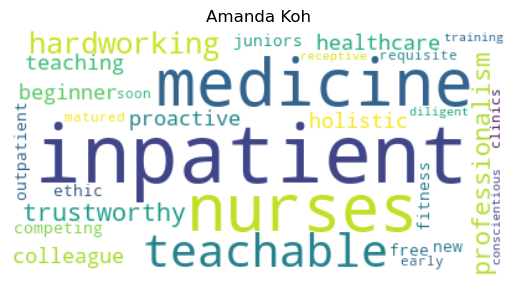

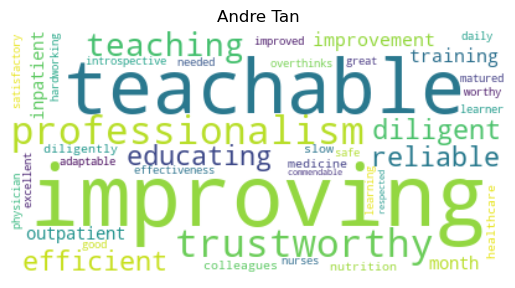

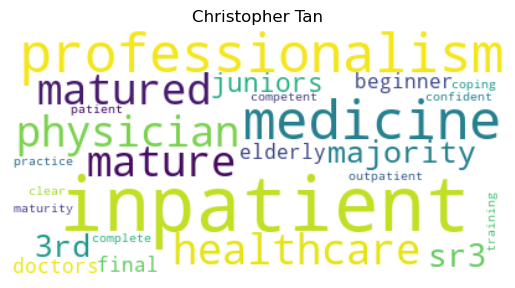

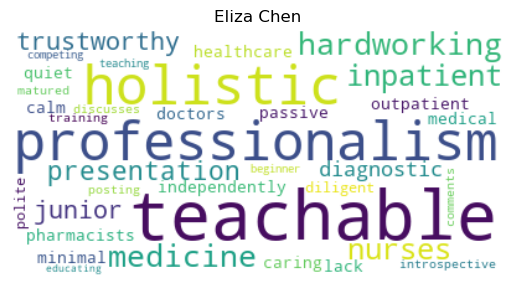

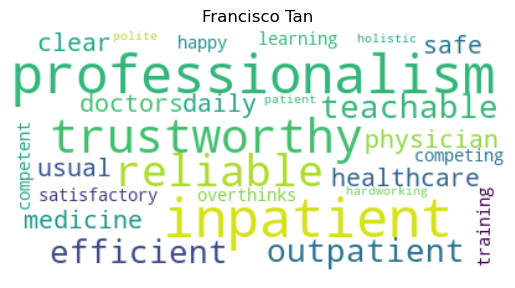

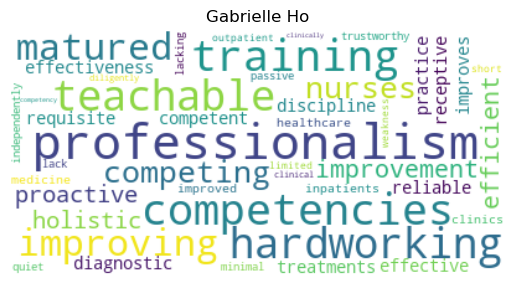

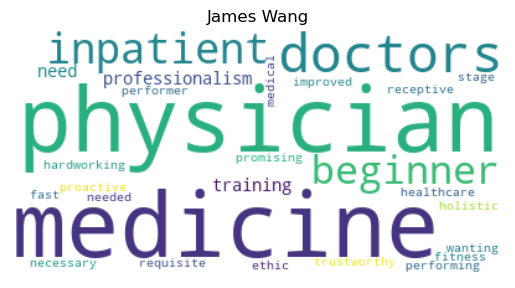

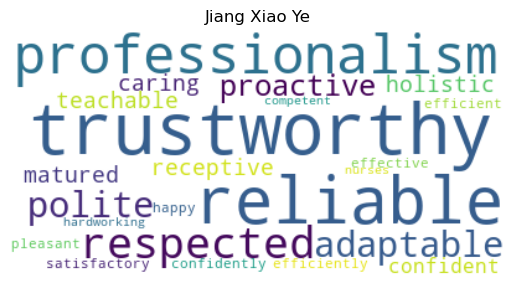

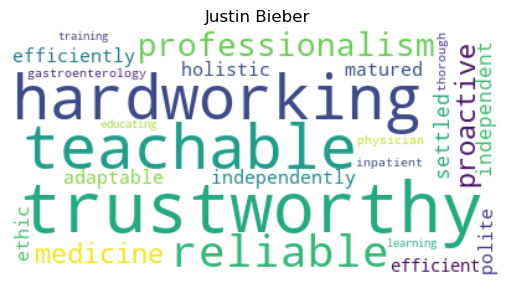

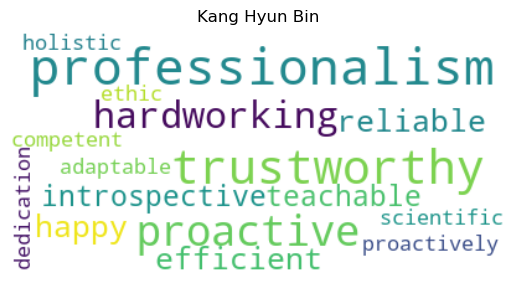

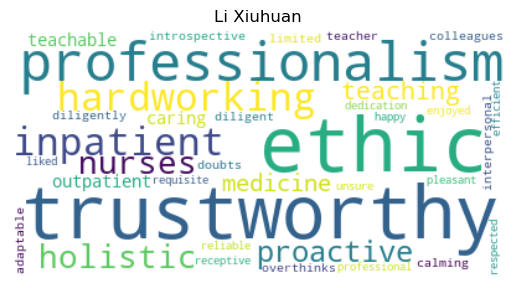

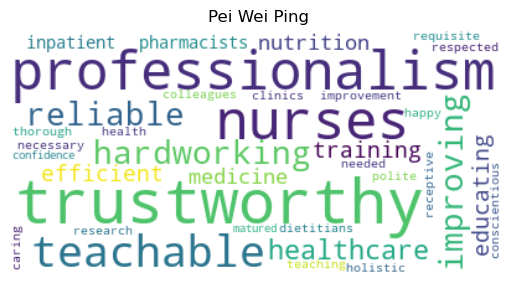

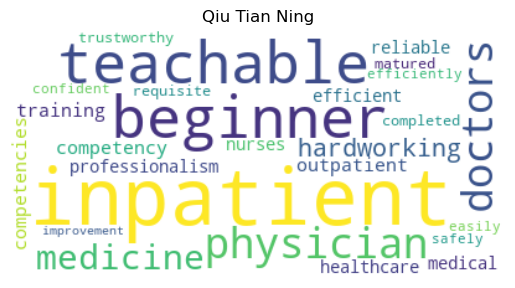

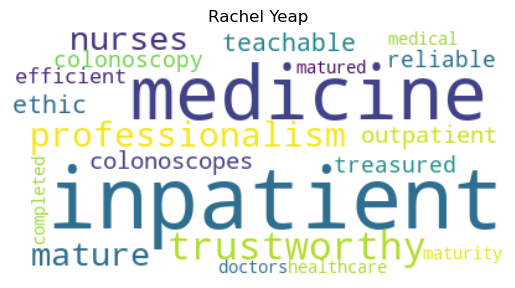

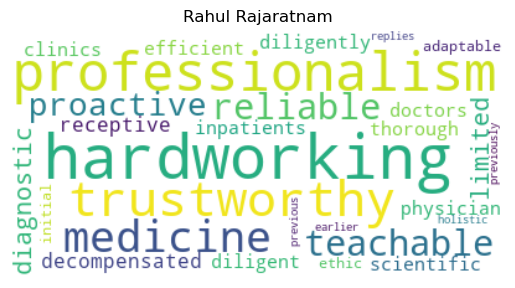

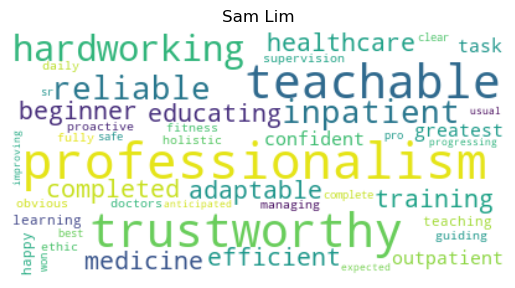

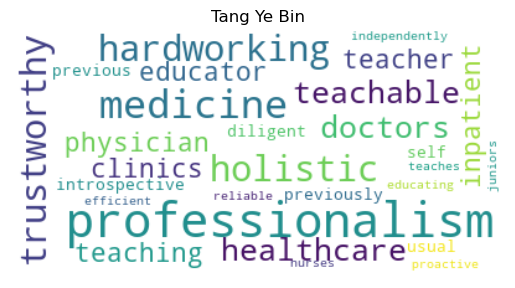

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud for each row with title
for index, row in out.iterrows():
    text = ' '.join(row['Keywords'])
    wordcloud = WordCloud(background_color='white').generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(row['Target:'])
    plt.show()

In [17]:
# BAR CHART BASED ON EVALUATOR

out2 =comments.groupby('Evaluator:')['Vader1 Score'].mean()



In [18]:
counts = comments['Evaluator:'].value_counts()

In [19]:
out2 = out2.to_frame().reset_index()
out2

,Evaluator:,Vader1 Score
0,"Dr. Abdul Halim, Nurul Aidah",0.624900
1,"Dr. Ang, Tiing Leong",0.394500
2,"Dr. Asokkumar, Ravishankar",0.495386
3,"Dr. Balasubramanian, Diraviyam",0.844200
4,"Dr. Chan, Webber Pak Wo",0.453267
5,"Dr. Chang, Jason Pik Eu",0.781550
6,"Dr. Cheah, Kee Leong",0.454850
7,"Dr. Cheah, Mark Chang Chuen",0.650371
8,"Dr. De Roza, Marianne",0.416767
9,"Dr. Gan, Sheryl Shien Wen",0.948500


In [20]:
counts= counts.to_frame().reset_index()

counts.columns = ['Evaluator:', 'Vader1 Score']
counts

,Evaluator:,Vader1 Score
0,"Dr. Salazar, Ennaliza",8
1,"Dr. Li, James Weiquan",8
2,"Dr. Kwek, Andrew Boon Eu",8
3,"Dr. Cheah, Mark Chang Chuen",7
4,"Dr. Asokkumar, Ravishankar",7
5,"Dr. Ong, Jeannie Peng Lan",7
6,"Dr. Chan, Webber Pak Wo",6
7,"Dr. Liou, Wei Lun",6
8,"Dr. Kumar, Rahul",6
9,"Dr. Khor, Christopher Jen Lock",6


In [21]:
test2 = pd.merge(out2,counts, on = ['Evaluator:'], how='left')
test3=test2[test2['Vader1 Score_y']>4]
test3

,Evaluator:,Vader1 Score_x,Vader1 Score_y
2,"Dr. Asokkumar, Ravishankar",0.495386,7
4,"Dr. Chan, Webber Pak Wo",0.453267,6
7,"Dr. Cheah, Mark Chang Chuen",0.650371,7
11,"Dr. Khor, Christopher Jen Lock",0.658550,6
12,"Dr. Krishnamoorthy, Thinesh Lee",0.774500,5
13,"Dr. Kumar, Rahul",0.679367,6
16,"Dr. Kwek, Andrew Boon Eu",0.505038,8
18,"Dr. Li, James Weiquan",0.672087,8
23,"Dr. Lim, Thomson Chong Teik",0.139260,5
26,"Dr. Liou, Wei Lun",0.606483,6


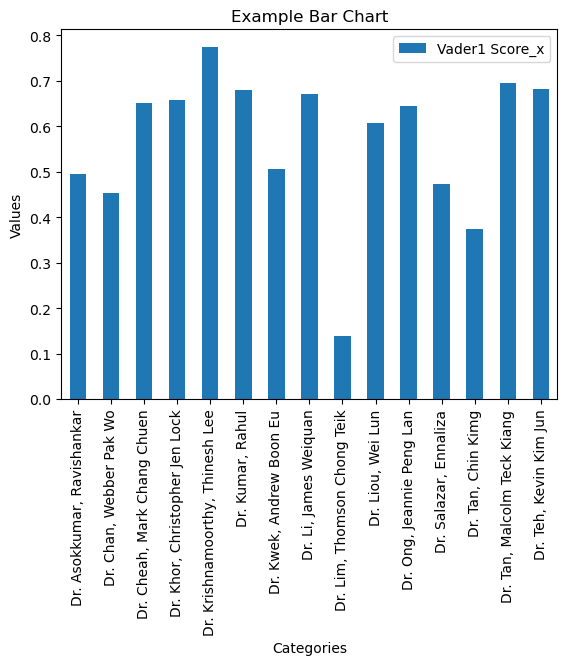

In [22]:
test3.plot(x='Evaluator:', y='Vader1 Score_x', kind='bar')

# Set the title and axis labels
plt.title('Example Bar Chart')
plt.xlabel('Categories')
plt.ylabel('Values')

# Show the plot
plt.show()

In [23]:
comments[['Answer:','Vader1 Score']].loc[comments['Evaluator:']=='Dr. Lim, Thomson Chong Teik']
#fucking need finetuning bro

,Answer:,Vader1 Score
21,Gabrielle is a hardworking SR who puts in extr...,0.0000
42,Resident is SR1 and is quickly learning to man...,0.0258
54,Justin is a hardworking Gastro SR that is also...,0.6705
65,Dr. Li is a hardworking SR that has the requir...,0.0000
81,Sam has all the qualities and skills expected ...,0.0000


In [24]:
# BAR CHART BASED ON SERVICE
out3 =comments.groupby('Service:')['Vader1 Score'].mean()
out3 = out3.to_frame().reset_index()
out3

,Service:,Vader1 Score
0,- -,0.722967
1,SHS-GASTRO:ADV ENDO-CGH,0.570992
2,SHS-GASTRO:BASIC ENDO-CGH,0.267750
3,SHS-GASTRO:BASIC ENDO-SGH,0.387554
4,SHS-GASTRO:GEN GASTROHEP(ELEC)-CGH,0.641262
5,SHS-GASTRO:GEN GASTROHEP(ELEC)-SGH,0.474425
6,SHS-GASTRO:GEN GASTROHEP(ELEC)-SKH,0.633067
7,SHS-GASTRO:GEN GASTROHEP-CGH,0.629730
8,SHS-GASTRO:GEN GASTROHEP-SGH,0.497309
9,SHS-GASTRO:IBD & NUTRI-SGH,0.613626


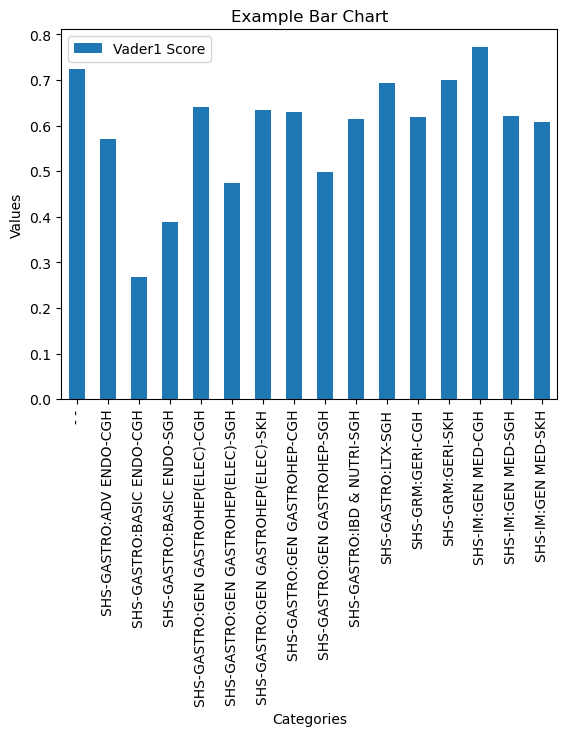

In [25]:
out3.plot(x='Service:', y='Vader1 Score', kind='bar')

# Set the title and axis labels
plt.title('Example Bar Chart')
plt.xlabel('Categories')
plt.ylabel('Values')

# Show the plot
plt.show()

In [26]:
comments[['Answer:']].loc[comments['Service:']=='SHS-GASTRO:BASIC ENDO-CGH'].loc[102].values.tolist()
#bro need finetuning

['Tian Ning is very competent as an SR1. She is able to identify gaps in her learning and to seek clarification when needed.']

In [27]:
# SCATTER PLOT BETWEEN COMMENT SCORE AND ANSWER SCORE
exam_score=pd.read_excel('evaluations_overall_score.xlsx')
exam_score['Answer']=exam_score['Answer:'].apply(lambda x:int(x[0]) )
exam_score= exam_score.drop('Answer:', axis=1)


In [28]:
comments

,Target:,Evaluator:,Rotation Dates:,Service:,Answer:,Vader1 Score,Textblob Score,Transformer Score,Doc_Embed,Distance,Keywords
0,Eliza Chen,"Dr. Ong, Andrew Ming Liang",7/1/2022-7/31/2022,- -,Eliza Chen is starting out and therefore as ex...,0.8954,0.171429,"TextClassificationResult(label='POSITIVE', sco...","[[-0.6721534, -0.027664, 0.70268226, -0.476056...","[[-0.09625689, 0.11881207, 1.9541476e-05, 0.09...","[outpatient, professionalism, holistic, teacha..."
1,Eliza Chen,"Dr. Chan, Webber Pak Wo",7/1/2022-7/31/2022,SHS-GASTRO:BASIC ENDO-SGH,"As a new senior resident to gastroenterology, ...",0.2732,0.136364,"TextClassificationResult(label='POSITIVE', sco...","[[-0.42423996, -0.6286227, 0.88219756, -0.6787...","[[-0.0859189, 0.17790526, -0.016277257, 0.0281...","[pharmacists, medicine, inpatients, inpatient,..."
2,Eliza Chen,"Dr. Lim, Chee Hooi",7/1/2022-7/31/2022,SHS-GASTRO:BASIC ENDO-SGH,No concern,-0.2960,0.000000,"TextClassificationResult(label='NEGATIVE', sco...","[[-0.6876688, 0.02974713, 0.109754026, 0.12074...","[[0.6711223, 0.41983747, 0.5360163, 0.5921104,...","[quiet, independently, minimal, passive, lack]"
3,Eliza Chen,"Dr. Chang, Jason Pik Eu",8/1/2022-8/31/2022,SHS-GASTRO:BASIC ENDO-SGH,Overall I would rate Eliza Chen highly as a SR...,0.8807,0.263750,"TextClassificationResult(label='POSITIVE', sco...","[[-0.6283155, -0.20029192, 1.1669189, -0.10387...","[[0.028535588, 0.28990865, 0.0832851, 0.186433...","[medical, doctors, healthcare, nurses, medicine]"
4,Eliza Chen,"Dr. Tan, Chee Kiat",8/1/2022-8/31/2022,SHS-GASTRO:BASIC ENDO-SGH,Eliza Chen has a quiet disposition and gives g...,0.6290,0.330000,"TextClassificationResult(label='POSITIVE', sco...","[[-0.8619444, -0.18374743, 0.21259235, 0.16743...","[[-0.0062184343, 0.13000053, 0.01491292, 0.150...","[caring, calm, diligent, polite, introspective]"
...,...,...,...,...,...,...,...,...,...,...,...
163,Rachel Yeap,"Dr. Tan, Malcolm Teck Kiang",7/1/2022-7/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,"did a week of bleeder call, good mgmt plans an...",0.3818,0.440625,"TextClassificationResult(label='NEGATIVE', sco...","[[0.1212126, -0.52477044, 1.1620986, -0.917062...","[[-0.061233785, 0.28290597, 0.0270812, -0.0234...","[outpatient, medicine, colonoscopes, 2022, col..."
164,Rachel Yeap,"Dr. Khor, Christopher Jen Lock",8/1/2022-8/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,"very competent, extremely professional, and a ...",0.7425,0.375000,"TextClassificationResult(label='POSITIVE', sco...","[[-0.2288021, -0.4193769, 0.4208119, 0.1031569...","[[0.2495091, 0.22908753, 0.33462763, 0.5758852...","[professionalism, treasured, reliable, efficie..."
165,Rachel Yeap,"Dr. Liou, Wei Lun",8/1/2022-8/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,No issue. Making good progress compared to fir...,0.5423,0.475000,"TextClassificationResult(label='POSITIVE', sco...","[[-0.34792647, -1.0121427, 0.16201107, -1.0558...","[[0.42752415, 0.48969555, 0.44772327, 0.458115...","[maturity, completed, matures, mature, matured]"
166,Rachel Yeap,"Dr. Loo, Khang Ning",9/1/2022-10/2/2022,SHS-IM:GEN MED-SGH,Rachel is clinically competent and I can trust...,0.7184,0.000000,"TextClassificationResult(label='POSITIVE', sco...","[[-0.5686393, -0.43344223, 0.682797, 0.342227,...","[[-0.14905263, 0.09871096, -0.12953652, 0.0126...","[doctors, medicine, inpatient, inpatients, nur..."


In [29]:
score_comments=pd.merge(comments,exam_score, on = ['Target:','Evaluator:','Rotation Dates:','Service:'], how='left')


<AxesSubplot:xlabel='Answer', ylabel='Density'>

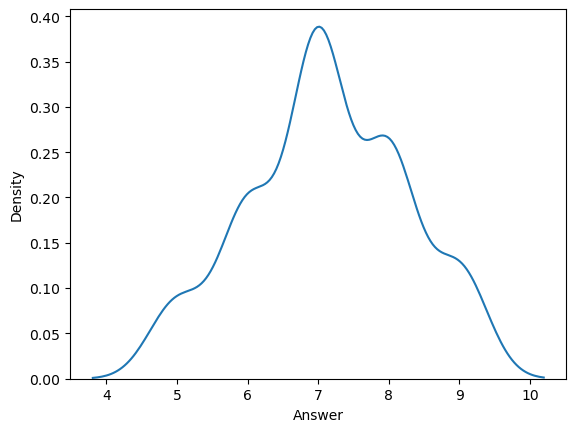

In [30]:
import seaborn as sns
sns.kdeplot(score_comments['Answer'])

<AxesSubplot:xlabel='Vader1 Score', ylabel='Density'>

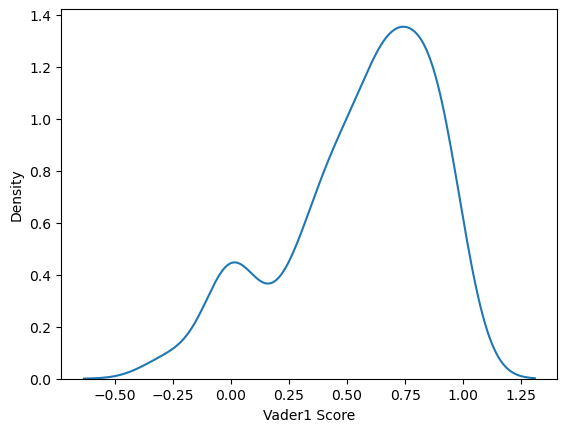

In [31]:
sns.kdeplot(score_comments['Vader1 Score'])

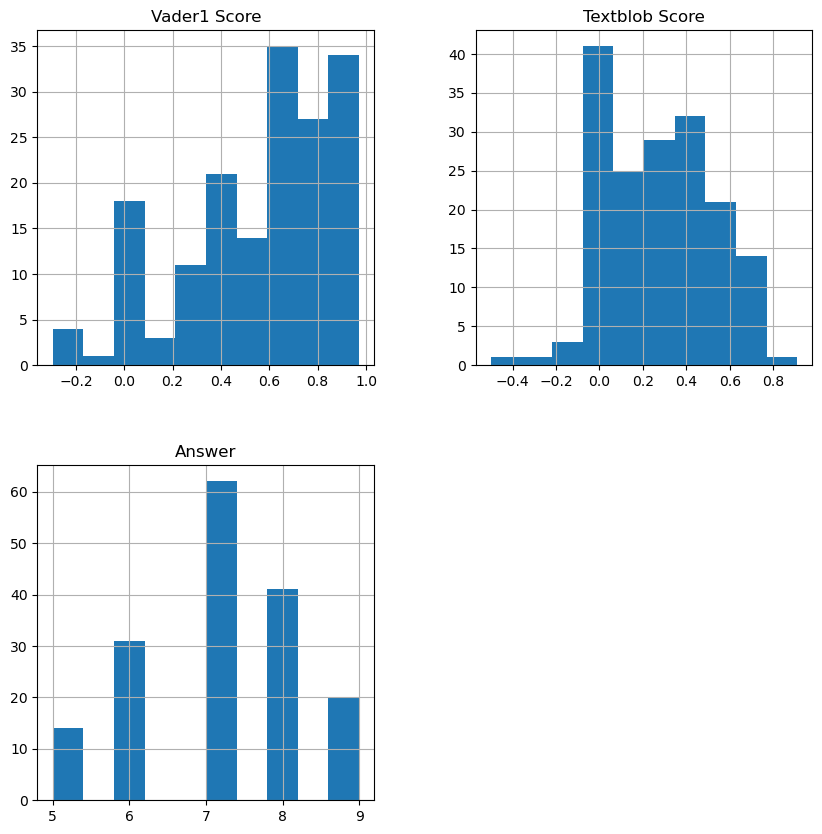

In [32]:
score_comments.hist(figsize=[10,10])
plt.show()

In [33]:
score_comments

,Target:,Evaluator:,Rotation Dates:,Service:,Answer:,Vader1 Score,Textblob Score,Transformer Score,Doc_Embed,Distance,Keywords,Answer
0,Eliza Chen,"Dr. Ong, Andrew Ming Liang",7/1/2022-7/31/2022,- -,Eliza Chen is starting out and therefore as ex...,0.8954,0.171429,"TextClassificationResult(label='POSITIVE', sco...","[[-0.6721534, -0.027664, 0.70268226, -0.476056...","[[-0.09625689, 0.11881207, 1.9541476e-05, 0.09...","[outpatient, professionalism, holistic, teacha...",5
1,Eliza Chen,"Dr. Chan, Webber Pak Wo",7/1/2022-7/31/2022,SHS-GASTRO:BASIC ENDO-SGH,"As a new senior resident to gastroenterology, ...",0.2732,0.136364,"TextClassificationResult(label='POSITIVE', sco...","[[-0.42423996, -0.6286227, 0.88219756, -0.6787...","[[-0.0859189, 0.17790526, -0.016277257, 0.0281...","[pharmacists, medicine, inpatients, inpatient,...",7
2,Eliza Chen,"Dr. Lim, Chee Hooi",7/1/2022-7/31/2022,SHS-GASTRO:BASIC ENDO-SGH,No concern,-0.2960,0.000000,"TextClassificationResult(label='NEGATIVE', sco...","[[-0.6876688, 0.02974713, 0.109754026, 0.12074...","[[0.6711223, 0.41983747, 0.5360163, 0.5921104,...","[quiet, independently, minimal, passive, lack]",5
3,Eliza Chen,"Dr. Chang, Jason Pik Eu",8/1/2022-8/31/2022,SHS-GASTRO:BASIC ENDO-SGH,Overall I would rate Eliza Chen highly as a SR...,0.8807,0.263750,"TextClassificationResult(label='POSITIVE', sco...","[[-0.6283155, -0.20029192, 1.1669189, -0.10387...","[[0.028535588, 0.28990865, 0.0832851, 0.186433...","[medical, doctors, healthcare, nurses, medicine]",7
4,Eliza Chen,"Dr. Tan, Chee Kiat",8/1/2022-8/31/2022,SHS-GASTRO:BASIC ENDO-SGH,Eliza Chen has a quiet disposition and gives g...,0.6290,0.330000,"TextClassificationResult(label='POSITIVE', sco...","[[-0.8619444, -0.18374743, 0.21259235, 0.16743...","[[-0.0062184343, 0.13000053, 0.01491292, 0.150...","[caring, calm, diligent, polite, introspective]",5
...,...,...,...,...,...,...,...,...,...,...,...,...
163,Rachel Yeap,"Dr. Tan, Malcolm Teck Kiang",7/1/2022-7/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,"did a week of bleeder call, good mgmt plans an...",0.3818,0.440625,"TextClassificationResult(label='NEGATIVE', sco...","[[0.1212126, -0.52477044, 1.1620986, -0.917062...","[[-0.061233785, 0.28290597, 0.0270812, -0.0234...","[outpatient, medicine, colonoscopes, 2022, col...",8
164,Rachel Yeap,"Dr. Khor, Christopher Jen Lock",8/1/2022-8/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,"very competent, extremely professional, and a ...",0.7425,0.375000,"TextClassificationResult(label='POSITIVE', sco...","[[-0.2288021, -0.4193769, 0.4208119, 0.1031569...","[[0.2495091, 0.22908753, 0.33462763, 0.5758852...","[professionalism, treasured, reliable, efficie...",7
165,Rachel Yeap,"Dr. Liou, Wei Lun",8/1/2022-8/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,No issue. Making good progress compared to fir...,0.5423,0.475000,"TextClassificationResult(label='POSITIVE', sco...","[[-0.34792647, -1.0121427, 0.16201107, -1.0558...","[[0.42752415, 0.48969555, 0.44772327, 0.458115...","[maturity, completed, matures, mature, matured]",8
166,Rachel Yeap,"Dr. Loo, Khang Ning",9/1/2022-10/2/2022,SHS-IM:GEN MED-SGH,Rachel is clinically competent and I can trust...,0.7184,0.000000,"TextClassificationResult(label='POSITIVE', sco...","[[-0.5686393, -0.43344223, 0.682797, 0.342227,...","[[-0.14905263, 0.09871096, -0.12953652, 0.0126...","[doctors, medicine, inpatient, inpatients, nur...",7


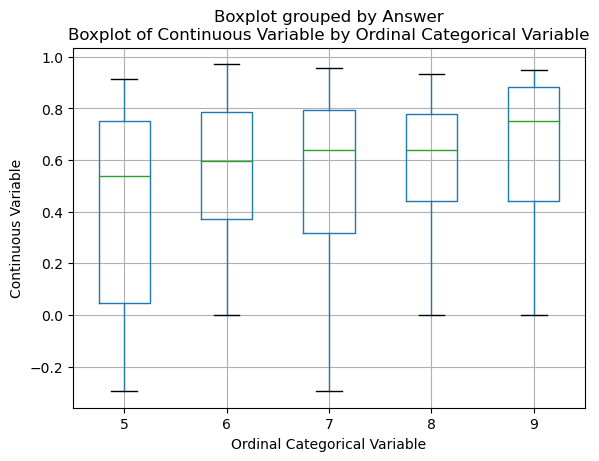

In [34]:
# Create a boxplot
score_comments.boxplot(column='Vader1 Score', by='Answer')

# Set the axis labels and title
plt.xlabel('Ordinal Categorical Variable')
plt.ylabel('Continuous Variable')
plt.title('Boxplot of Continuous Variable by Ordinal Categorical Variable')

# Show the plot
plt.show()

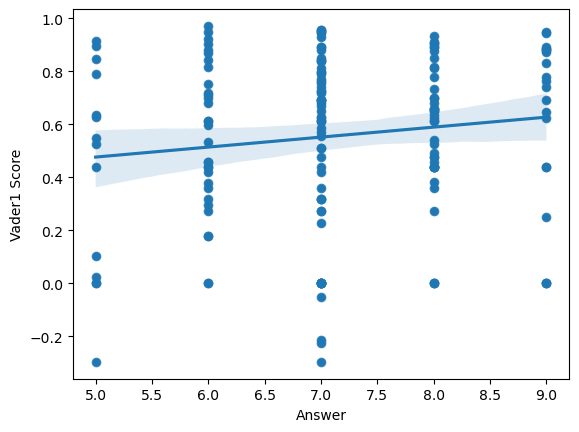

In [35]:

# Create a scatter plot using seaborn
sns.scatterplot(y='Vader1 Score', x='Answer', data=score_comments)

# Add a best fit line to the scatter plot
sns.regplot(y='Vader1 Score', x='Answer', data=score_comments)

# Display the plot
plt.show()

In [36]:
import pandas as pd
comments=pd.read_excel('evaluations_overall_comments.xlsx')
comments

,Target:,Evaluator:,Rotation Dates:,Service:,Answer:
0,Eliza Chen,"Dr. Ong, Andrew Ming Liang",7/1/2022-7/31/2022,- -,Eliza Chen is starting out and therefore as ex...
1,Eliza Chen,"Dr. Chan, Webber Pak Wo",7/1/2022-7/31/2022,SHS-GASTRO:BASIC ENDO-SGH,"As a new senior resident to gastroenterology, ..."
2,Eliza Chen,"Dr. Lim, Chee Hooi",7/1/2022-7/31/2022,SHS-GASTRO:BASIC ENDO-SGH,No concern
3,Eliza Chen,"Dr. Chang, Jason Pik Eu",8/1/2022-8/31/2022,SHS-GASTRO:BASIC ENDO-SGH,Overall I would rate Eliza Chen highly as a SR...
4,Eliza Chen,"Dr. Tan, Chee Kiat",8/1/2022-8/31/2022,SHS-GASTRO:BASIC ENDO-SGH,Eliza Chen has a quiet disposition and gives g...
...,...,...,...,...,...
163,Rachel Yeap,"Dr. Tan, Malcolm Teck Kiang",7/1/2022-7/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,"did a week of bleeder call, good mgmt plans an..."
164,Rachel Yeap,"Dr. Khor, Christopher Jen Lock",8/1/2022-8/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,"very competent, extremely professional, and a ..."
165,Rachel Yeap,"Dr. Liou, Wei Lun",8/1/2022-8/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,No issue. Making good progress compared to fir...
166,Rachel Yeap,"Dr. Loo, Khang Ning",9/1/2022-10/2/2022,SHS-IM:GEN MED-SGH,Rachel is clinically competent and I can trust...


In [37]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import softmax
import csv
import urllib.request

# Preprocess text (username and link placeholders)
def preprocess(text):
    new_text = []
 
 
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

# Tasks:
# emoji, emotion, hate, irony, offensive, sentiment
# stance/abortion, stance/atheism, stance/climate, stance/feminist, stance/hillary

task='sentiment'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

tokenizer = AutoTokenizer.from_pretrained(MODEL)

# download label mapping
labels=[]
mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
labels = [row[1] for row in csvreader if len(row) > 1]

# PT
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
model.save_pretrained(MODEL)

comments['processed']=comments['Answer:'].apply(lambda x: preprocess(x))
comments['encoded']=comments['processed'].apply(lambda x:tokenizer(x,return_tensors='pt'))
comments['output']=comments['encoded'].apply(lambda x:model(**x))
comments['scores']=comments['output'].apply(lambda x:softmax(x[0][0].detach().numpy()))
print(comments)



         Target:                      Evaluator:       Rotation Dates:  \
0     Eliza Chen      Dr. Ong, Andrew Ming Liang    7/1/2022-7/31/2022   
1     Eliza Chen         Dr. Chan, Webber Pak Wo    7/1/2022-7/31/2022   
2     Eliza Chen              Dr. Lim, Chee Hooi    7/1/2022-7/31/2022   
3     Eliza Chen         Dr. Chang, Jason Pik Eu    8/1/2022-8/31/2022   
4     Eliza Chen              Dr. Tan, Chee Kiat    8/1/2022-8/31/2022   
..           ...                             ...                   ...   
163  Rachel Yeap     Dr. Tan, Malcolm Teck Kiang    7/1/2022-7/31/2022   
164  Rachel Yeap  Dr. Khor, Christopher Jen Lock    8/1/2022-8/31/2022   
165  Rachel Yeap               Dr. Liou, Wei Lun    8/1/2022-8/31/2022   
166  Rachel Yeap             Dr. Loo, Khang Ning    9/1/2022-10/2/2022   
167  Rachel Yeap        Dr. Kwek, Andrew Boon Eu  10/3/2022-10/31/2022   

                         Service:  \
0                             - -   
1       SHS-GASTRO:BASIC ENDO-SGH   


In [140]:
comments['neu']=comments['scores'].apply(lambda x: x[1])
comments[['Answer:','neu']].loc[comments['neu']>0.7]

,Answer:,neu
2,No concern,0.744895
5,Please see comments above,0.864153
18,No concern,0.744895
20,able to act independently in most of the clini...,0.840395
50,Able to work almost independently.n,0.704185
56,"Keen to learn, follows through on tasks, techn...",0.769361
89,Knowledge aspect needs further improvement,0.700757
113,As per earlier comments,0.849452
122,We had discussed previously about Andre's 5 pe...,0.742418
124,Andre would need to show more dedication to le...,0.708658


In [141]:
comments['neg']=comments['scores'].apply(lambda x: x[0])
comments[['Answer:','neg']].loc[comments['neg']>0.3].values.tolist()

[['Xiuhuan cares for her patients and that\'s evident from how she greets them as people when doing the round (as opposed to patients). However she needs to apply herself more. Although she is gaining the skills and knowledge requisite of her level, she needs to remember that she is training to be a consultant and not a SR. She sometimes "hedges" her diagnosis and this approach will make her less effective in the long run.',
  0.4184384047985077],
 ['enthusiastic but sometimes may lost focus', 0.37071284651756287],
 ['I think overall whilst Andre is not a malignant person, he requires supervision to complete his tasks. With regards to his leave practices, to give him the benefit of the doubt, he "might not have known" and he certainly has needs for his family, however the lack of consideration on the impact of his own learning, and the impact this has on others having to cover him for weekends and ward duties is of concern.',
  0.47441616654396057],
 ['I have not written much in this a

In [40]:
comments['pos']=comments['scores'].apply(lambda x: x[2])
comments[['Answer:','pos']].loc[comments['pos']<0.2].values.tolist()

[['No concern', 0.07848860323429108],
 ['Eliza Chen has a quiet disposition and gives good thoughts to her management. However, because she is a bit too quiet, she does not project the impression that she have good control over her subordinates. There were knowledge gaps as we discuss cases - she is aware of them and has insight.',
  0.19857768714427948],
 ['Please see comments above', 0.04341280087828636],
 ['No concern', 0.07848860323429108],
 ['Had a short week with her, hence limited interactions.',
  0.032620709389448166],
 ['able to act independently in most of the clinical situation',
  0.08608968555927277],
 ['Keen to learn, follows through on tasks, technical competencies adequate for level of training, takes effort to reflect on learning points',
  0.18451350927352905],
 ['Xiuhuan cares for her patients and that\'s evident from how she greets them as people when doing the round (as opposed to patients). However she needs to apply herself more. Although she is gaining the skil

In [41]:

comments[['Answer:','scores']]

,Answer:,scores
0,Eliza Chen is starting out and therefore as ex...,"[0.012829757, 0.21647434, 0.7706959]"
1,"As a new senior resident to gastroenterology, ...","[0.0025204902, 0.059670344, 0.9378091]"
2,No concern,"[0.17661668, 0.74489474, 0.0784886]"
3,Overall I would rate Eliza Chen highly as a SR...,"[0.010495567, 0.1125953, 0.8769091]"
4,Eliza Chen has a quiet disposition and gives g...,"[0.18982491, 0.6115974, 0.19857769]"
...,...,...
163,"did a week of bleeder call, good mgmt plans an...","[0.07528579, 0.526805, 0.3979092]"
164,"very competent, extremely professional, and a ...","[0.002622035, 0.022788968, 0.974589]"
165,No issue. Making good progress compared to fir...,"[0.0041091316, 0.06917517, 0.9267157]"
166,Rachel is clinically competent and I can trust...,"[0.010198248, 0.18377367, 0.80602807]"


======================================================== CLUSTERING STARTS HERE =======================================================

In [42]:
# year of training (Personal Details)
# compliance (Didactic Attendance)
# comment score (Evaluation)
# answer score (Evaluation)
# procedure (Procedure Log)

In [43]:
personal=pd.read_excel('personal_details.xlsx')
eval_scores=pd.read_excel('evaluations_overall_score.xlsx')

didactic=pd.read_excel('didactic_attendance.xlsx')
didactic

,MCR,Target:,Mmm/Yyyy,Posting Institution,Posting Department,Attended Teachings,Scheduled Teachings,% Compliance
0,M60683J,Andre Tan,2022-07-01,SGH,SGHGasEnt,14,14,1.000000
1,M64141I,Eliza Chen,2022-07-01,SGH,SGHGasEnt,12,14,0.857143
2,M61612G,Gabrielle Ho,2022-07-01,CGH,CGHGasHep,9,12,0.750000
3,M63062J,Jiang Xiao Ye,2022-07-01,CGH,CGHGasHep,12,12,1.000000
4,M62077E,Kang Hyun Bin,2022-07-01,CGH,CGHGasHep,9,12,0.750000
...,...,...,...,...,...,...,...,...
97,M62162F,Sam Lim,2022-12-01,SGH,SGHGasEnt,13,14,0.928571
98,M19919H,Christopher Tan,2022-12-01,SGH,SGHGasEnt,12,14,0.857143
99,M65113A,Tang Ye Bin,2022-12-01,SGH,SGHGasEnt,13,14,0.928571
100,M61467A,Francisco Tan,2022-12-01,SGH,SGHGasEnt,12,14,0.857143


In [44]:
didactic[['Target:','% Compliance']]
print(personal[['MCR No','Year of Training']])
print(exam_score[['Target:','Answer']])

     MCR No Year of Training
0   M64141I              SR1
1   M63216A              SR1
2   M64837A              SR1
3   M63612H              SR1
4   M62162F              SR1
5   M61612G              SR2
6   M63062J              SR2
7   M61079A              SR2
8   M65113A              SR2
9   M61467A              SR2
10  M63484C              SR2
11  M60683J              SR3
12  M62077E              SR3
13  M61370G              SR3
14  M64015B              SR3
15  M62157E              SR3
16  M19919H              SR3
         Target:  Answer
0     Eliza Chen       5
1     Eliza Chen       7
2     Eliza Chen       5
3     Eliza Chen       7
4     Eliza Chen       5
..           ...     ...
163  Rachel Yeap       8
164  Rachel Yeap       7
165  Rachel Yeap       8
166  Rachel Yeap       7
167  Rachel Yeap       7

[168 rows x 2 columns]


In [45]:
didactic

,MCR,Target:,Mmm/Yyyy,Posting Institution,Posting Department,Attended Teachings,Scheduled Teachings,% Compliance
0,M60683J,Andre Tan,2022-07-01,SGH,SGHGasEnt,14,14,1.000000
1,M64141I,Eliza Chen,2022-07-01,SGH,SGHGasEnt,12,14,0.857143
2,M61612G,Gabrielle Ho,2022-07-01,CGH,CGHGasHep,9,12,0.750000
3,M63062J,Jiang Xiao Ye,2022-07-01,CGH,CGHGasHep,12,12,1.000000
4,M62077E,Kang Hyun Bin,2022-07-01,CGH,CGHGasHep,9,12,0.750000
...,...,...,...,...,...,...,...,...
97,M62162F,Sam Lim,2022-12-01,SGH,SGHGasEnt,13,14,0.928571
98,M19919H,Christopher Tan,2022-12-01,SGH,SGHGasEnt,12,14,0.857143
99,M65113A,Tang Ye Bin,2022-12-01,SGH,SGHGasEnt,13,14,0.928571
100,M61467A,Francisco Tan,2022-12-01,SGH,SGHGasEnt,12,14,0.857143


In [46]:
exam_score_groupby=exam_score.groupby('Target:')['Answer'].mean()
exam_score_groupby=exam_score_groupby.to_frame()
didactic_groupby=didactic.groupby('Target:')['% Compliance'].mean()
didactic_groupby=didactic_groupby.to_frame()

In [47]:
comments

,Target:,Evaluator:,Rotation Dates:,Service:,Answer:,processed,encoded,output,scores,neu,neg,pos
0,Eliza Chen,"Dr. Ong, Andrew Ming Liang",7/1/2022-7/31/2022,- -,Eliza Chen is starting out and therefore as ex...,Eliza Chen is starting out and therefore as ex...,"[input_ids, attention_mask]","{'logits': [[tensor(-2.3454, grad_fn=<UnbindBa...","[0.012829757, 0.21647434, 0.7706959]",0.216474,0.012830,0.770696
1,Eliza Chen,"Dr. Chan, Webber Pak Wo",7/1/2022-7/31/2022,SHS-GASTRO:BASIC ENDO-SGH,"As a new senior resident to gastroenterology, ...","As a new senior resident to gastroenterology, ...","[input_ids, attention_mask]","{'logits': [[tensor(-2.9243, grad_fn=<UnbindBa...","[0.0025204902, 0.059670344, 0.9378091]",0.059670,0.002520,0.937809
2,Eliza Chen,"Dr. Lim, Chee Hooi",7/1/2022-7/31/2022,SHS-GASTRO:BASIC ENDO-SGH,No concern,No concern,"[input_ids, attention_mask]","{'logits': [[tensor(-0.1904, grad_fn=<UnbindBa...","[0.17661668, 0.74489474, 0.0784886]",0.744895,0.176617,0.078489
3,Eliza Chen,"Dr. Chang, Jason Pik Eu",8/1/2022-8/31/2022,SHS-GASTRO:BASIC ENDO-SGH,Overall I would rate Eliza Chen highly as a SR...,Overall I would rate Eliza Chen highly as a SR...,"[input_ids, attention_mask]","{'logits': [[tensor(-2.1626, grad_fn=<UnbindBa...","[0.010495567, 0.1125953, 0.8769091]",0.112595,0.010496,0.876909
4,Eliza Chen,"Dr. Tan, Chee Kiat",8/1/2022-8/31/2022,SHS-GASTRO:BASIC ENDO-SGH,Eliza Chen has a quiet disposition and gives g...,Eliza Chen has a quiet disposition and gives g...,"[input_ids, attention_mask]","{'logits': [[tensor(-0.4185, grad_fn=<UnbindBa...","[0.18982491, 0.6115974, 0.19857769]",0.611597,0.189825,0.198578
...,...,...,...,...,...,...,...,...,...,...,...,...
163,Rachel Yeap,"Dr. Tan, Malcolm Teck Kiang",7/1/2022-7/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,"did a week of bleeder call, good mgmt plans an...","did a week of bleeder call, good mgmt plans an...","[input_ids, attention_mask]","{'logits': [[tensor(-1.2227, grad_fn=<UnbindBa...","[0.07528579, 0.526805, 0.3979092]",0.526805,0.075286,0.397909
164,Rachel Yeap,"Dr. Khor, Christopher Jen Lock",8/1/2022-8/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,"very competent, extremely professional, and a ...","very competent, extremely professional, and a ...","[input_ids, attention_mask]","{'logits': [[tensor(-2.4629, grad_fn=<UnbindBa...","[0.002622035, 0.022788968, 0.974589]",0.022789,0.002622,0.974589
165,Rachel Yeap,"Dr. Liou, Wei Lun",8/1/2022-8/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,No issue. Making good progress compared to fir...,No issue. Making good progress compared to fir...,"[input_ids, attention_mask]","{'logits': [[tensor(-2.6766, grad_fn=<UnbindBa...","[0.0041091316, 0.06917517, 0.9267157]",0.069175,0.004109,0.926716
166,Rachel Yeap,"Dr. Loo, Khang Ning",9/1/2022-10/2/2022,SHS-IM:GEN MED-SGH,Rachel is clinically competent and I can trust...,Rachel is clinically competent and I can trust...,"[input_ids, attention_mask]","{'logits': [[tensor(-2.3950, grad_fn=<UnbindBa...","[0.010198248, 0.18377367, 0.80602807]",0.183774,0.010198,0.806028


In [48]:

comments_groupby=comments.groupby('Target:')['pos'].mean()
comments_groupby=comments_groupby.to_frame()

In [89]:
cluster_df=comments_groupby.merge(exam_score_groupby,how='inner',on='Target:').merge(didactic_groupby,how='inner',on='Target:')

In [93]:
cluster_df.index

Index(['Amanda Koh', 'Andre Tan', 'Christopher Tan', 'Eliza Chen',
       'Francisco Tan', 'Gabrielle Ho', 'James Wang', 'Jiang Xiao Ye',
       'Justin Bieber', 'Kang Hyun Bin', 'Li Xiuhuan', 'Pei Wei Ping',
       'Qiu Tian Ning', 'Rachel Yeap', 'Rahul Rajaratnam', 'Sam Lim',
       'Tang Ye Bin'],
      dtype='object', name='Target:')

In [66]:
cluster_df.to_excel('cluster_df.xlsx')

In [94]:
cluster_df=pd.read_excel('cluster_df.xlsx')

In [101]:
cluster_df=cluster_df.set_index('Target:')
cluster_df

,pos,Answer,% Compliance,Procedures
Target:,,,,
Amanda Koh,0.702590,6.363636,0.795635,91
Andre Tan,0.627803,6.250000,0.831349,608
Christopher Tan,0.742413,8.750000,0.819444,612
Eliza Chen,0.618651,6.200000,0.924603,35
Francisco Tan,0.782295,7.250000,0.928571,651
Gabrielle Ho,0.642040,7.000000,0.805556,149
James Wang,0.657804,5.857143,0.888889,63
Jiang Xiao Ye,0.738620,7.625000,0.851190,522
Justin Bieber,0.711947,7.375000,0.865079,544


In [155]:
specific_procedures=pd.read_excel('procedures.xlsx')
specific_procedures=specific_procedures.set_index('Unnamed: 0')
specific_procedures=specific_procedures.T

specific_procedures=specific_procedures.fillna(0)
specific_procedures

Unnamed: 0,Abdominal paracentesis,Capsule endoscopy,Colonoscopy,Colonoscopy with biopsy,Colonoscopy with non-variceal hemostasis; actively bleeding,Colonoscopy with non-variceal hemostasis; not actively bleeding,Colonoscopy with polypectomy,Endoscopic mucosal resection (EMR) / Endoscopic submucosal dissection (ESD),Endoscopic Retrograde and Cholangiocpancreatography (ERCP),Endoscopic ultrasound,...,Gastroscopy (OGD) with non-variceal hemostasis; actively bleeding,Gastroscopy (OGD) with non-variceal hemostasis; not actively bleeding,Gastroscopy with variceal hemostasis; active bleeding,Gastroscopy with variceal hemostasis; not actively bleeding,Gastroscopy with variceal ligation; elective eradication,Liver biopsy,Luminal Stenting,Percutaneous Endoscopic Gastrostomy (PEG),Retrieval of foreign body,Other Procedures (typed in)
Jiang Xiao Ye,10.0,7.0,5.0,38.0,2.0,8.0,48.0,4.0,6.0,7.0,...,7.0,8.0,2.0,4.0,2.0,5.0,5.0,8.0,2.0,0.0
Gabrielle Ho,0.0,1.0,2.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,...,3.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
Eliza Chen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
Kang Hyun Bin,19.0,10.0,191.0,33.0,3.0,3.0,83.0,5.0,5.0,6.0,...,38.0,14.0,8.0,3.0,10.0,7.0,5.0,5.0,0.0,0.0
Amanda Koh,7.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,6.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
Justin Bieber,0.0,5.0,0.0,121.0,0.0,3.0,46.0,7.0,5.0,5.0,...,12.0,11.0,9.0,5.0,6.0,0.0,4.0,2.0,0.0,0.0
Li Xiuhuan,4.0,122.0,66.0,8.0,131.0,0.0,5.0,6.0,7.0,1.0,...,1.0,8.0,3.0,6.0,5.0,5.0,5.0,0.0,0.0,0.0
Sam Lim,15.0,1.0,0.0,35.0,2.0,3.0,11.0,3.0,11.0,7.0,...,12.0,7.0,7.0,8.0,3.0,4.0,2.0,2.0,0.0,0.0
Pei Wei Ping,14.0,10.0,30.0,104.0,2.0,0.0,70.0,5.0,7.0,5.0,...,39.0,6.0,18.0,1.0,13.0,5.0,7.0,11.0,0.0,0.0
Qiu Tian Ning,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
total_df=pd.merge(cluster_personal_df, personal, left_on='Target:', right_on='Staff Name')

In [116]:
cluster_personal_df=pd.merge(cluster_df, personal, left_on='Target:', right_on='Staff Name')

In [ ]:
cluster_personal_df=cluster_personal_df[['pos','Answer','% Compliance','Procedures','Staff Name','Year of Training']]
cluster_personal_df
# cluster_personal_df = pd.get_dummies(cluster_personal_df, columns=["Year of Training"])
cluster_personal_df=cluster_personal_df.set_index('Staff Name')


In [128]:
# cluster_personal_df=cluster_personal_df.set_index('Staff Name')
cluster_personal_df

,pos,Answer,% Compliance,Procedures,Year of Training_SR1,Year of Training_SR2,Year of Training_SR3
Staff Name,,,,,,,
Amanda Koh,0.702590,6.363636,0.795635,91,1,0,0
Andre Tan,0.627803,6.250000,0.831349,608,0,0,1
Christopher Tan,0.742413,8.750000,0.819444,612,0,0,1
Eliza Chen,0.618651,6.200000,0.924603,35,1,0,0
Francisco Tan,0.782295,7.250000,0.928571,651,0,1,0
Gabrielle Ho,0.642040,7.000000,0.805556,149,0,1,0
James Wang,0.657804,5.857143,0.888889,63,1,0,0
Jiang Xiao Ye,0.738620,7.625000,0.851190,522,0,1,0
Justin Bieber,0.711947,7.375000,0.865079,544,0,1,0


In [135]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = MinMaxScaler()
df2=scaler.fit_transform(cluster_personal_df)

In [136]:
df2

array([[0.48130176, 0.17508418, 0.        , 0.055666  , 1.        ,
        0.        , 0.        ],
       [0.09045816, 0.13580247, 0.2278481 , 0.5695825 , 0.        ,
        0.        , 1.        ],
       [0.68941551, 1.        , 0.15189873, 0.57355865, 0.        ,
        0.        , 1.        ],
       [0.04263119, 0.11851852, 0.82278481, 0.        , 1.        ,
        0.        , 0.        ],
       [0.89784325, 0.48148148, 0.84810127, 0.61232604, 0.        ,
        1.        , 0.        ],
       [0.16486268, 0.39506173, 0.06329114, 0.11332008, 0.        ,
        1.        , 0.        ],
       [0.2472459 , 0.        , 0.59493671, 0.027833  , 1.        ,
        0.        , 0.        ],
       [0.6695937 , 0.61111111, 0.35443038, 0.48409543, 0.        ,
        1.        , 0.        ],
       [0.53019934, 0.52469136, 0.44303797, 0.50596421, 0.        ,
        1.        , 0.        ],
       [1.        , 0.59259259, 0.09055501, 1.        , 0.        ,
        0.        , 1. 

<AxesSubplot:ylabel='Unnamed: 0'>

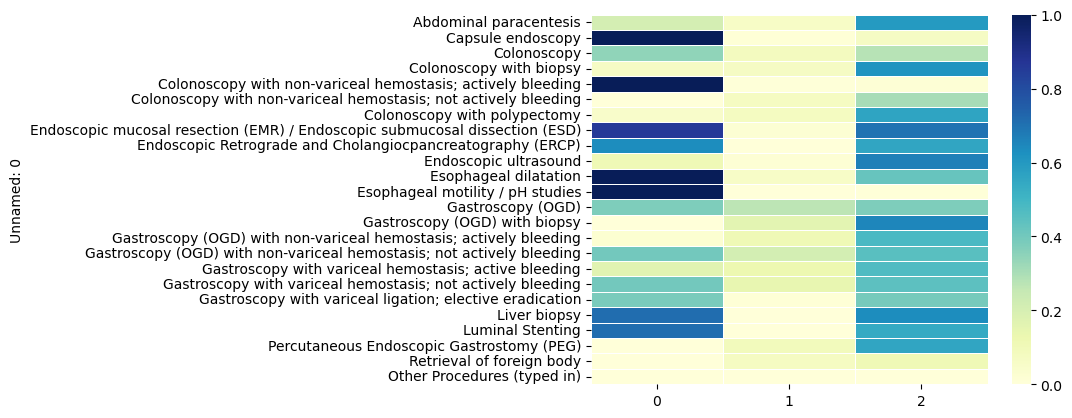

In [164]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = MinMaxScaler()
specific_procedures2=scaler.fit_transform(specific_procedures)
from sklearn.cluster import KMeans
model_4 = KMeans(n_clusters = 3, random_state=0)
model_4.fit(specific_procedures2)
model_4.cluster_centers_
clust_means = pd.DataFrame(model_4.cluster_centers_, columns=specific_procedures.columns)
clust_means.T
import seaborn as sns
sns.heatmap(clust_means.T,  linewidths=.5, cmap="YlGnBu")

In [137]:

from sklearn.cluster import KMeans
model_5 = KMeans(n_clusters = 3, random_state=0)
type(model_5)
model_5.fit(df2)
model_5.cluster_centers_

array([[0.53730667, 0.52949246, 0.51476793, 0.42229954, 0.        ,
        1.        , 0.        ],
       [0.56700979, 0.60328515, 0.22119442, 0.70808482, 0.        ,
        0.        , 1.        ],
       [0.36751083, 0.17216611, 0.52848101, 0.10263419, 1.        ,
        0.        , 0.        ]])

In [138]:
clust_means = pd.DataFrame(model_5.cluster_centers_, columns=cluster_personal_df.columns)
clust_means.T

,0,1,2
pos,0.537307,0.567010,0.367511
Answer,0.529492,0.603285,0.172166
% Compliance,0.514768,0.221194,0.528481
Procedures,0.422300,0.708085,0.102634
Year of Training_SR1,0.000000,0.000000,1.000000
Year of Training_SR2,1.000000,0.000000,0.000000
Year of Training_SR3,0.000000,1.000000,0.000000


<AxesSubplot:>

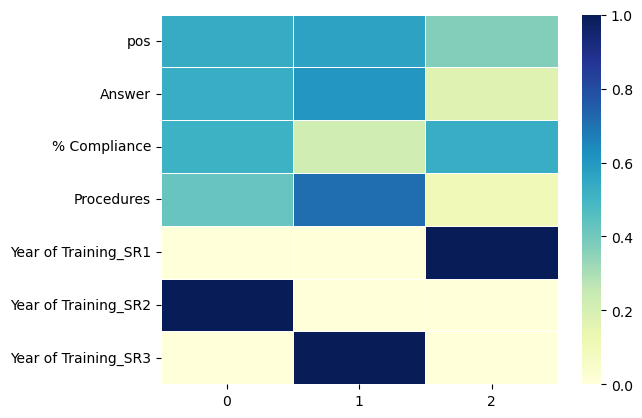

In [139]:
import seaborn as sns
sns.heatmap(clust_means.T,  linewidths=.5, cmap="YlGnBu")